# Computer Lab 2: Copernican Revolution

## Introduction
To start off this assignment, we begin by importing the modules we need. As always, we will need `numpy` and `matplotlib.pyplot`; we will also need `pandas`'s input and output capabilities to read our data, so let's import it, too. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('astron_obs.csv')
df

,times,angle_sun,angle_mercury,angle_venus,angle_mars,angle_jupiter,angle_saturn,angle_uranus,dist_sun,dist_mercury,dist_venus,dist_mars,dist_jupiter,dist_saturn,dist_uranus
0,0,3.141593,3.141593,3.141593,0.000000,0.000000,0.000000,0.000000,1.514898e+11,8.156325e+10,4.275863e+10,9.780769e+10,6.641576e+11,1.355945e+12,2.853888e+12
1,864000,-2.975192,3.064365,3.040696,-0.061618,-0.021517,-0.012646,-0.006821,1.514476e+11,8.962979e+10,4.497884e+10,9.934092e+10,6.663722e+11,1.358166e+12,2.856083e+12
2,1728000,-2.808606,3.102151,2.993685,-0.112457,-0.041574,-0.024654,-0.013363,1.513220e+11,1.114080e+11,5.102819e+10,1.037892e+11,6.729236e+11,1.364752e+12,2.862601e+12
3,2592000,-2.641654,-3.011822,3.014262,-0.145140,-0.058852,-0.035423,-0.019361,1.511166e+11,1.422155e+11,5.966524e+10,1.107580e+11,6.835446e+11,1.375480e+12,2.873245e+12
4,3456000,-2.474164,-2.731334,3.090046,-0.156764,-0.072275,-0.044423,-0.024570,1.508367e+11,1.749718e+11,6.981303e+10,1.197405e+11,6.978185e+11,1.389988e+12,2.887691e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,1573344000,-2.208709,-2.381319,-2.576082,-0.316731,0.823585,-2.105389,-2.517825,1.502653e+11,1.871890e+11,2.337618e+11,1.558785e+11,6.543037e+11,1.559701e+12,2.913716e+12
1822,1574208000,-2.039140,-2.022149,-2.362804,-0.261611,0.802403,-2.083695,-2.507717,1.498352e+11,2.011616e+11,2.389721e+11,1.689446e+11,6.591247e+11,1.560299e+12,2.903958e+12
1823,1575072000,-1.868548,-1.684073,-2.148437,-0.196207,0.783582,-2.062092,-2.498209,1.493662e+11,1.992888e+11,2.434116e+11,1.822430e+11,6.682259e+11,1.557221e+12,2.890574e+12
1824,1575936000,-1.696850,-1.382472,-1.933036,-0.122304,0.768384,-2.040898,-2.489501,1.488716e+11,1.882821e+11,2.470921e+11,1.955961e+11,6.812442e+11,1.550498e+12,2.873872e+12


<p style="color:red">Diagram here</p>

## Geocentric Model
We now move onto the pre-Copernican portion of the assignment, where we will begin work on the several components of the geocentric model.

### Deferrent
Let's start by modeling the deferrent via uniform circular motion for Mars. We're told that our model will take the following form:  
  
$$ \tilde{x} = \overline{r}\cdot[\cos(\Omega t+\theta_0)] $$
$$ \tilde{y} = \overline{r}\cdot[\cos(\Omega t+\theta_0)] $$
  
We're also given that $\theta = \Omega t+\theta_0$. Let's start, then, with estimating $\Omega$ and $\theta_0$. First, let's isolate our Mars data.

In [3]:
t = df['times']
theta = df['angle_mars']
r = df['dist_mars']

We also need to convert the angular values to their total measures, not just the instantaneous angle. We can use `numpy.unwrap()` for this.

In [4]:
theta = np.unwrap(theta)
theta

array([ 0.00000000e+00, -6.16175683e-02, -1.12457388e-01, ...,
        1.63166611e+02,  1.63240514e+02,  1.63321501e+02])

We can use `numpy.polynomial.polynomial.polyfit()` in place of MATLAB's `polyfit()` command, with our `theta` array as our "$y$" and our `t` array as our "$x$". The degree of the polynomial will be selected as $1$, to fit a constant and one coefficient.

In [5]:
theta_naught, omega = np.polynomial.polynomial.polyfit(t, theta, 1, full = False)
print("theta_naught = " + str(theta_naught))
print("omega = " + str(omega))

theta_naught = -0.06016555169258942
omega = 1.0412362147269856e-07


This tells us that $\theta_0=2.346\times10^{-1}$ radians and $\Omega=-2.820\times10^{-10}$ radians per second. We can also easily estimate $\overline{r}$.

In [6]:
r_bar = np.mean(r)
print("r_bar = " + str(r_bar))

r_bar = 254023800284.93872


Thus, $\overline{r} = 2.540\times10^{11}$ meters. Let's estimate $\tilde{x}$ and $\tilde{y}$, now.

In [7]:
x_tilde = r_bar * np.cos(omega * t + theta_naught)
y_tilde = r_bar * np.sin(omega * t + theta_naught)

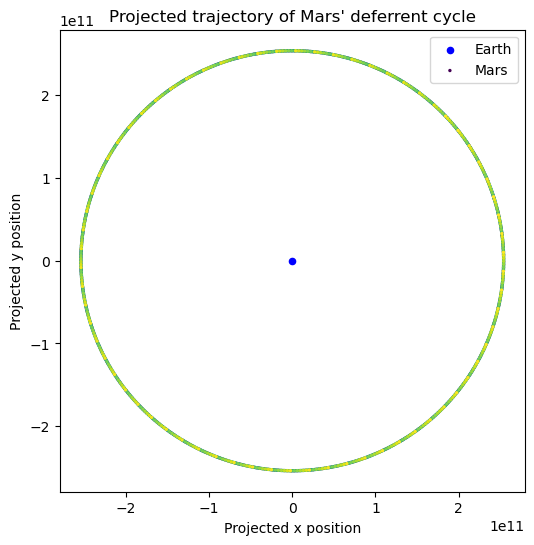

In [8]:
# Plot Mars' modeled trajectory
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(0, 0, s = 20, c = "blue", label = "Earth")
ax.scatter(x_tilde, y_tilde, s = 2, c = t, label = "Mars")
ax.set_title("Projected trajectory of Mars' deferrent cycle")
ax.set_xlabel("Projected x position")
ax.set_ylabel("Projected y position")
ax.legend()

Let's see what the residuals of our predicted angle values look like compared to the true values by recreating the $\Omega t + \theta_0$ component of our calculation.

In [9]:
proj_theta = omega * t + theta_naught

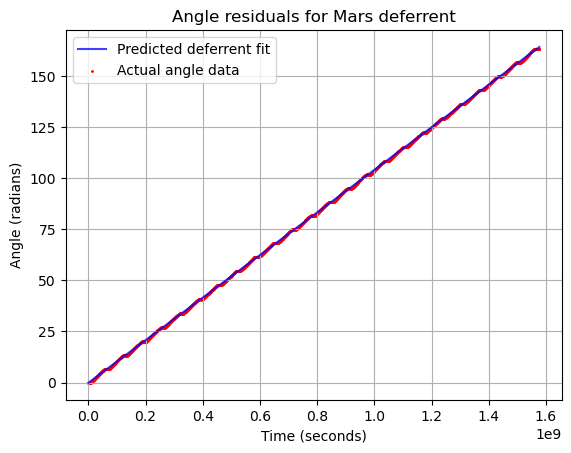

In [10]:
# Plot angle residuals
fig, ax = plt.subplots()
ax.plot(t, proj_theta, color = "blue", alpha = 0.75, label = "Predicted deferrent fit")
ax.scatter(t, theta, s = 1, color = "red", label = "Actual angle data")
ax.set_title("Angle residuals for Mars deferrent")
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Angle (radians)")
ax.legend()
ax.grid()

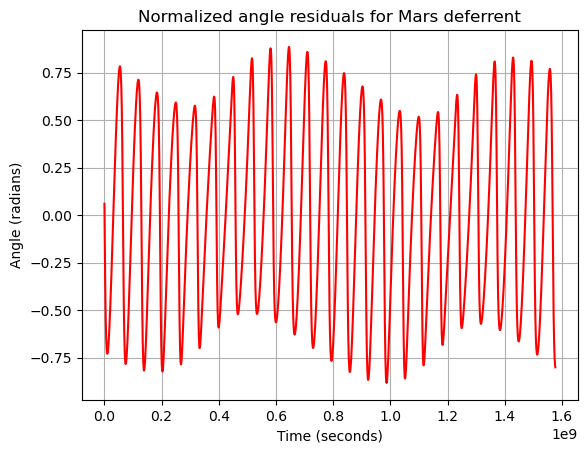

In [11]:
# Plot angle residuals
fig, ax = plt.subplots()
ax.plot(t, theta - proj_theta, color = "red")
ax.set_title("Normalized angle residuals for Mars deferrent")
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Angle (radians)")
ax.grid()

By using the Euclidean distance formula, we can also calculate our distance residuals.

In [12]:
proj_dist = np.sqrt(x_tilde ** 2 + y_tilde ** 2)

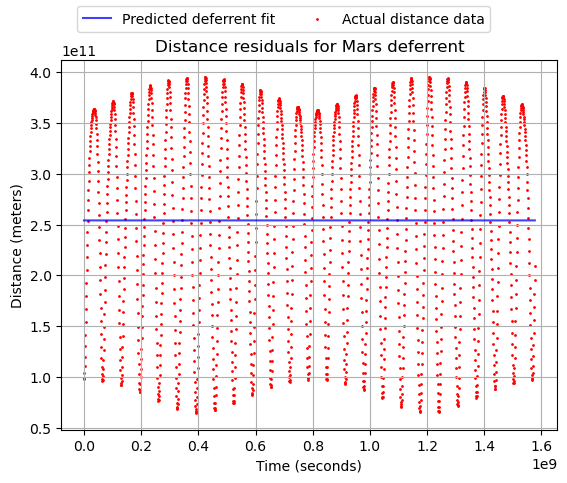

In [13]:
# Plot distance residuals
fig, ax = plt.subplots()
ax.plot(t, proj_dist, color = "blue", alpha = 0.75, label = "Predicted deferrent fit")
ax.scatter(t, r, s = 1, color = "red", label = "Actual distance data")
ax.set_title("Distance residuals for Mars deferrent")
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Distance (meters)")
fig.legend(loc = "upper center", ncol = 2)
ax.grid()

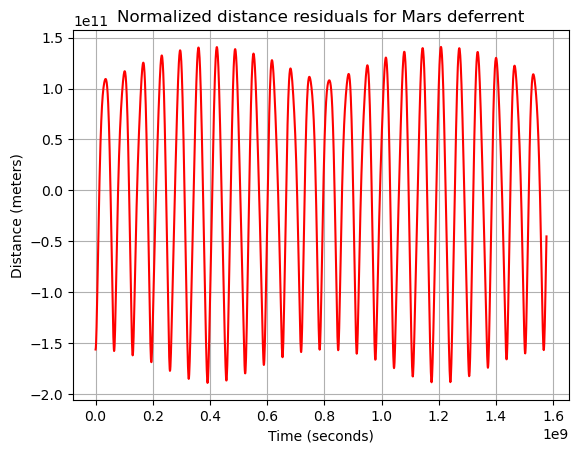

In [14]:
# Plot distance residuals
fig, ax = plt.subplots()
ax.plot(t, r - proj_dist, color = "red")
ax.set_title("Normalized distance residuals for Mars deferrent")
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Distance (meters)")
ax.grid()

### Epicycle
Now, we're adding an epicycle fit to the model. We're given the following set of equations to describe Mars' position:  
  
$$ \tilde{x} = \overline{r}\cdot[\cos(\Omega t+\theta_0)+a\cos(\omega t+\theta_1)] $$
$$ \tilde{y} = \overline{r}\cdot[\sin(\Omega t+\theta_0)+a\sin(\omega t+\theta_1)] $$  
  
Let's start by finding the true position of Mars.

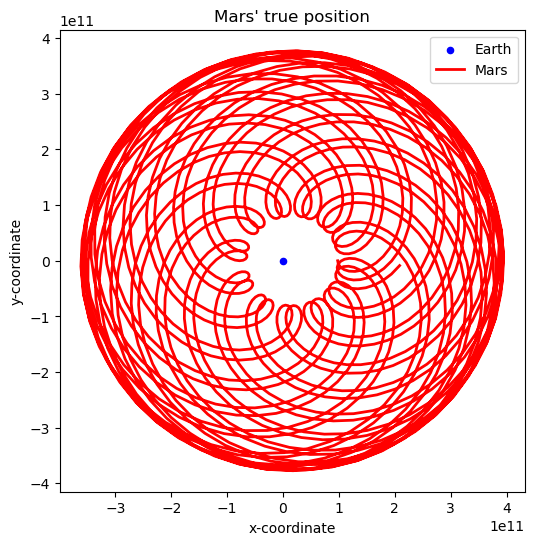

In [15]:
true_x = r * np.cos(theta)
true_y = r * np.sin(theta)

# Plot true trajectories
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(0, 0, s = 20, c = "blue", label = "Earth")
ax.plot(true_x, true_y, color = "red", lw = 2, label = "Mars")
ax.set_title("Mars' true position")
ax.set_xlabel("x-coordinate")
ax.set_ylabel("y-coordinate")
ax.legend()

Now, let's plot the true positions minus our deferrent estimate to find the remainder term to be considered in the epicycle estimate.

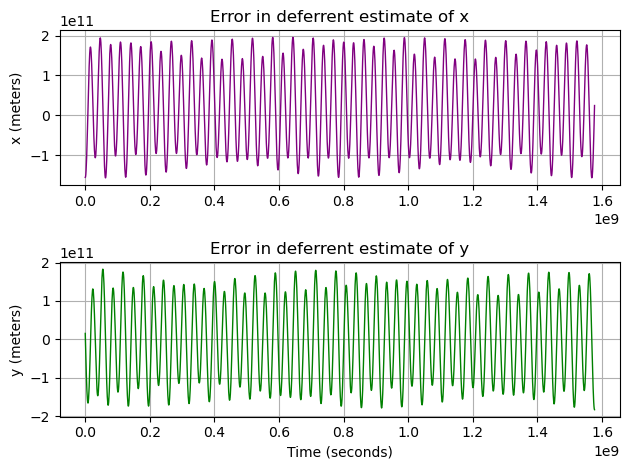

In [16]:
fig, axs = plt.subplots(2, 1)

# Plot x error
axs[0].plot(t, true_x - x_tilde, color = "purple", lw = 1)
axs[0].set_title("Error in deferrent estimate of x")
axs[0].set_ylabel("x (meters)")
axs[0].grid()

# Plot y error
axs[1].plot(t, true_y - y_tilde, color = "green", lw = 1)
axs[1].set_title("Error in deferrent estimate of y")
axs[1].set_ylabel("y (meters)")
axs[1].grid()

plt.xlabel("Time (seconds)")
plt.tight_layout()

We can work directly on these plots to try and estimate the missing components.

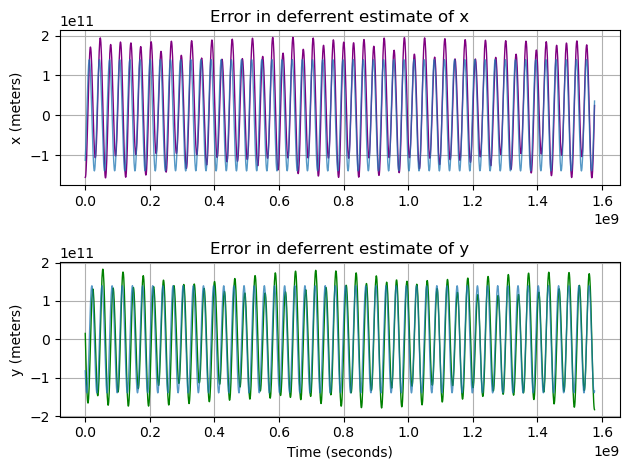

In [17]:
a = 0.55
lower_omega = 2 * 10**(-7)
theta_one = 6 * np.pi / 5

fig, axs = plt.subplots(2, 1)

# Plot x error
axs[0].plot(t, true_x - x_tilde, color = "purple", lw = 1, label = "Error from deferrent in x")
axs[0].plot(t, r_bar * a * np.cos(lower_omega * t + theta_one), 
            lw = 1, alpha = 0.75)
axs[0].set_title("Error in deferrent estimate of x")
axs[0].set_ylabel("x (meters)")
axs[0].grid()

# Plot y error
axs[1].plot(t, np.subtract(true_y, y_tilde), color = "green", lw = 1, label = "Error from deferrent in y")
axs[1].plot(t, r_bar * a * np.sin(lower_omega * t + theta_one), 
            lw = 1, alpha = 0.75)
axs[1].set_title("Error in deferrent estimate of y")
axs[1].set_ylabel("y (meters)")
axs[1].grid()

plt.xlabel("Time (seconds)")
plt.tight_layout()

Some manual tweaking was done to find these values, but given that $a$ alone controls the amplitude, $\omega$ alone controls the period, and $\theta_1$ alone controls the phase offset, said tweaking was not too difficult. Our estimate for the epicycle parameters, then, is $a=0.55$, $\omega=2\times10^{-7}$, and $\theta_1=\frac{6\pi}{5}$. Let's calculate our new estimates and see how their residuals shape up.

In [18]:
# Calculate estimates
x_tilde_epi = x_tilde + r_bar * a * np.cos(lower_omega * t + theta_one)
y_tilde_epi = y_tilde + r_bar * a * np.sin(lower_omega * t + theta_one)

# Calculate projected distances
proj_dist_epi = np.sqrt(x_tilde_epi ** 2 + y_tilde_epi ** 2)

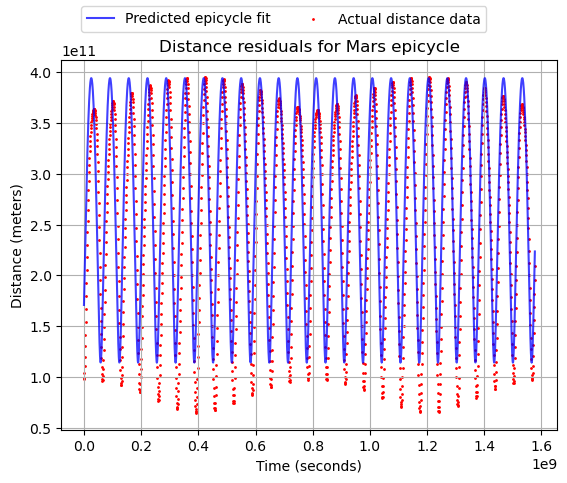

In [19]:
# Plot distance residuals
fig, ax = plt.subplots()
ax.plot(t, proj_dist_epi, color = "blue", alpha = 0.75, label = "Predicted epicycle fit")
ax.scatter(t, r, s = 1, color = "red", label = "Actual distance data")
ax.set_title("Distance residuals for Mars epicycle")
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Distance (meters)")
fig.legend(loc = "upper center", ncol = 2)
ax.grid()

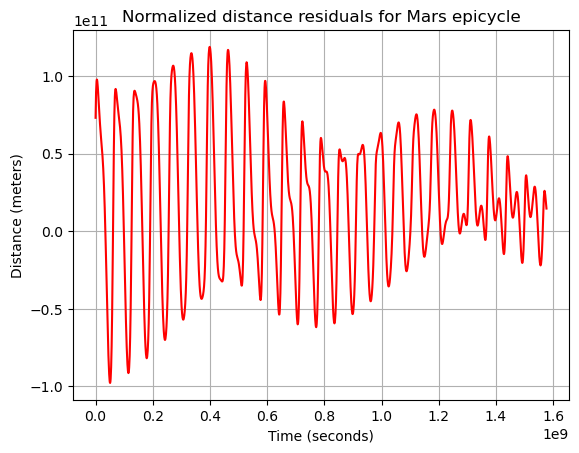

In [20]:
# Plot distance residuals
fig, ax = plt.subplots()
ax.plot(t, proj_dist_epi - r, color = "red")
ax.set_title("Normalized distance residuals for Mars epicycle")
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Distance (meters)")
ax.grid()

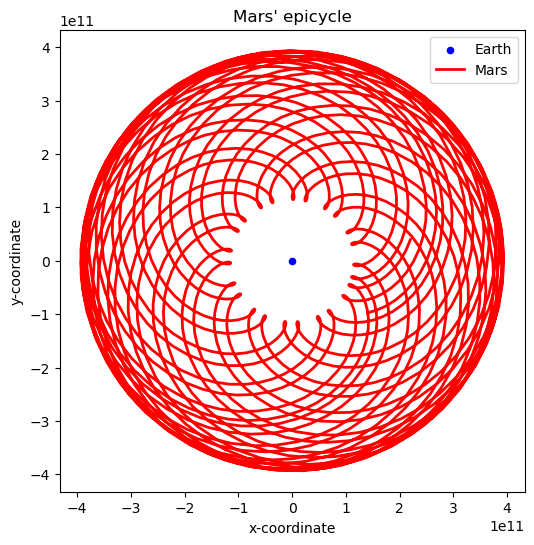

In [21]:
# Plot epicycle trajectories
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(0, 0, s = 20, c = "blue", label = "Earth")
ax.plot(x_tilde_epi, y_tilde_epi, color = "red", lw = 2, label = "Mars")
ax.set_title("Mars' epicycle")
ax.set_xlabel("x-coordinate")
ax.set_ylabel("y-coordinate")
ax.legend()

Although actual error for the epicycle remains high in certain points, the oscillations present from the epicycle are clear and provide us with a much more accurate picture of Mars' "orbit around Earth." We do have to guesstimate our optimal values here --- `polyfit()` can't be used as the system of equations governing the epicycle's Cartesian coordiantes is no longer a linear system and can thus no longer be expressed as a polynomial. However, if the centered average (in relation to the average of the observations) and standard deviation of our residuals reach a global minimum, then we will have the best possible fit. 

### Eccentric
Finally, we are adding an eccentric, as according to the following:  
  
$$ \tilde{x} = \overline{r}\cdot[\cos(\Omega t+\theta_0)+a\cos(\omega t+\theta_1)+b\cos(\theta_2)] $$
$$ \tilde{y} = \overline{r}\cdot[\sin(\Omega t+\theta_0)+a\sin(\omega t+\theta_1)+b\sin(\theta_2)] $$
  
Let's start by plotting our error between the true positions of Mars and our estimates from the epicycle.

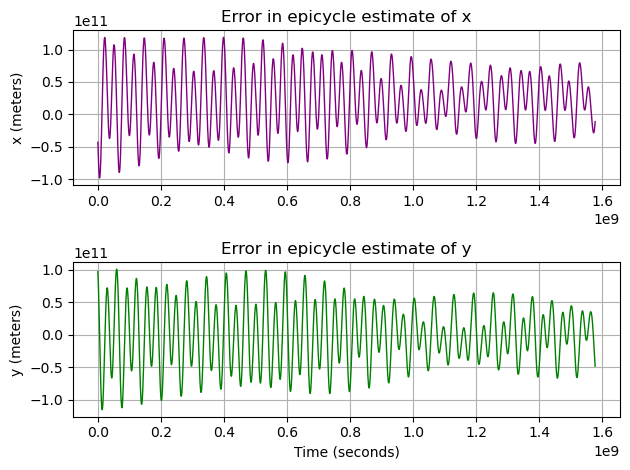

In [24]:
fig, axs = plt.subplots(2, 1)

# Plot x error
axs[0].plot(t, true_x - x_tilde_epi, color = "purple", lw = 1)
axs[0].set_title("Error in epicycle estimate of x")
axs[0].set_ylabel("x (meters)")
axs[0].grid()

# Plot y error
axs[1].plot(t, true_y - y_tilde_epi, color = "green", lw = 1)
axs[1].set_title("Error in epicycle estimate of y")
axs[1].set_ylabel("y (meters)")
axs[1].grid()

plt.xlabel("Time (seconds)")
plt.tight_layout()

Since $b\cos(\theta_2)$ and $b\sin(\theta_2)$ are constants, we really just want to find a solution to the following system of equations:  
  
$$ \overline{r}b\cos(\theta_2)=E[x-\tilde{x}] $$
$$ \overline{r}b\sin(\theta_2)=E[y-\tilde{y}] $$  
   
Applying the fact that $\cos^2(\theta_2)+\sin^2(\theta_2)=1$, we find the following:  
  
$$ (\overline{r}b)^2 = (E[x-\tilde{x}])^2 + (E[y-\tilde{y}])^2 $$  
$$ b = \frac{\sqrt{(E[x-\tilde{x}])^2 + (E[y-\tilde{y}])^2}}{\overline{r}} $$  
  
and using what we know about trigonometry, the following is trivial:  
  
$$ \theta_2 = \tan^{-1}\left(\frac{E[y-\tilde{y}]}{E[x-\tilde{x}]}\right) $$

In [42]:
b = np.sqrt(np.mean(true_x - x_tilde_epi)**2 + np.mean(true_y - y_tilde_epi)**2) / r_bar
theta_two = np.arctan2(np.mean(true_y - y_tilde_epi), np.mean(true_x - x_tilde_epi))

In [43]:
b

0.09497245966231183

In [34]:
theta_two

-0.0034977375858068344

Thus we find $b=9.497\times10^{-2}$ and $\theta_2=-3.498\times10^{-3}$. Let's see how that looks on our plots from above.

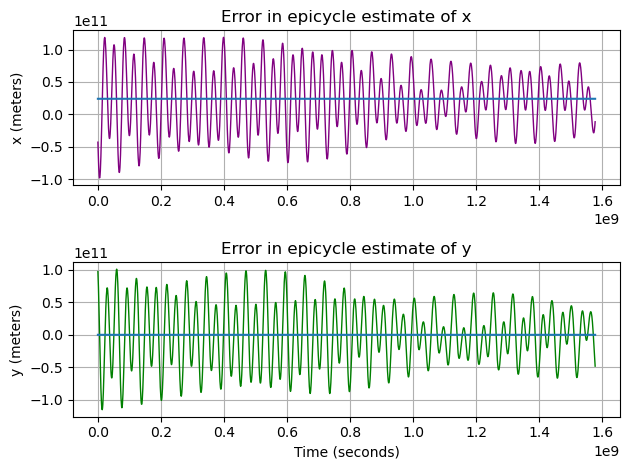

In [44]:
fig, axs = plt.subplots(2, 1)

# Plot x error
axs[0].plot(t, true_x - x_tilde_epi, color = "purple", lw = 1)
axs[0].plot(t, r_bar * b * np.cos(theta_two) * np.ones_like(true_x))
axs[0].set_title("Error in epicycle estimate of x")
axs[0].set_ylabel("x (meters)")
axs[0].grid()

# Plot y error
axs[1].plot(t, true_y - y_tilde_epi, color = "green", lw = 1)
axs[1].plot(t, r_bar * b * np.sin(theta_two) * np.ones_like(true_y))
axs[1].set_title("Error in epicycle estimate of y")
axs[1].set_ylabel("y (meters)")
axs[1].grid()

plt.xlabel("Time (seconds)")
plt.tight_layout()

These seem like pretty good estimates for the "center" of the epicycle's error. Now, let's add these to our estimates and plot them.

In [46]:
x_tilde_ecc = x_tilde_epi + r_bar * b * np.cos(theta_two) * np.ones_like(x_tilde_epi)
y_tilde_ecc = y_tilde_epi + r_bar * b * np.sin(theta_two) * np.ones_like(y_tilde_epi)

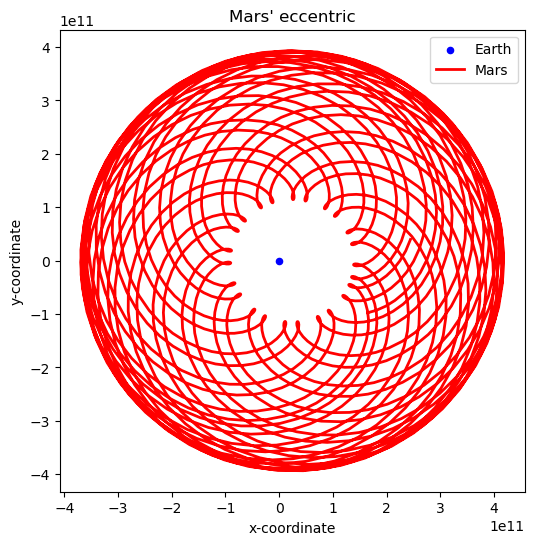

In [47]:
# Plot eccentric trajectories
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(0, 0, s = 20, c = "blue", label = "Earth")
ax.plot(x_tilde_ecc, y_tilde_ecc, color = "red", lw = 2, label = "Mars")
ax.set_title("Mars' eccentric")
ax.set_xlabel("x-coordinate")
ax.set_ylabel("y-coordinate")
ax.legend()

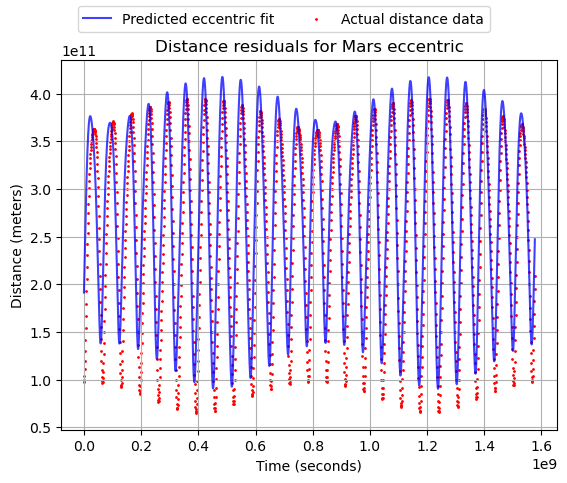

In [49]:
# Calculate projected eccentric distances
proj_dist_ecc = np.sqrt(x_tilde_ecc ** 2 + y_tilde_ecc ** 2)

# Plot distance residuals
fig, ax = plt.subplots()
ax.plot(t, proj_dist_ecc, color = "blue", alpha = 0.75, label = "Predicted eccentric fit")
ax.scatter(t, r, s = 1, color = "red", label = "Actual distance data")
ax.set_title("Distance residuals for Mars eccentric")
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Distance (meters)")
fig.legend(loc = "upper center", ncol = 2)
ax.grid()

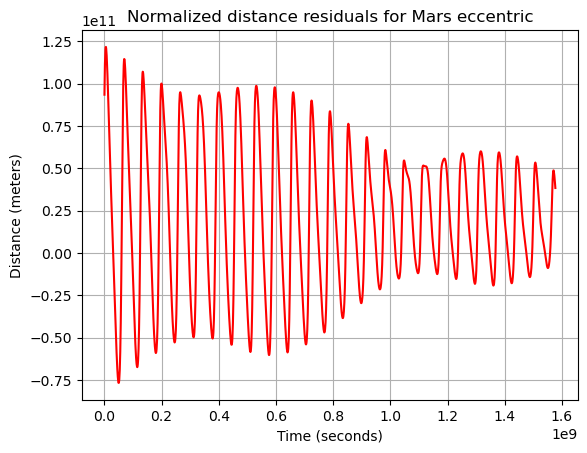

In [50]:
# Plot distance residuals
fig, ax = plt.subplots()
ax.plot(t, proj_dist_ecc - r, color = "red")
ax.set_title("Normalized distance residuals for Mars eccentric")
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Distance (meters)")
ax.grid()

### Trajectory error
Now, let's plot the error of our estimate against the true rotation of Mars.

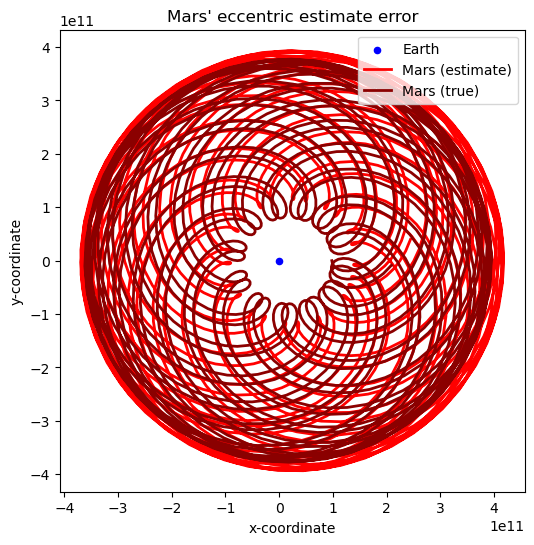

In [52]:
# Plot epicycle trajectories
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(0, 0, s = 20, c = "blue", label = "Earth")
ax.plot(x_tilde_ecc, y_tilde_ecc, color = "red", lw = 2, label = "Mars (estimate)")
ax.plot(true_x, true_y, color = "darkred", lw = 2, label = "Mars (true)")
ax.set_title("Mars' eccentric estimate error")
ax.set_xlabel("x-coordinate")
ax.set_ylabel("y-coordinate")
ax.legend()

## Heliocentric Model, Copernicus and Kepler
Now, we shift our focus onto early formulations of the heliocentric model.

### Sun-centered trajectories
First, we want to see what a heliocentric model would look like overall. Our data is given to us completely in relation to Earth, so we need to follow two steps to convert the data to heliocentric. First, we need to find the Cartesian coordinates of the data rather than the polar coordinates. Then, we need to add an Earth column, shift the coordinates so that the Sun is at $(0,0)$. Let's start with the polar-to-Cartesian transformation.

In [73]:
df_helio = pd.DataFrame({
    'mercury_x': df['dist_mercury'] * np.cos(df['angle_mercury']),
    'mercury_y': df['dist_mercury'] * np.sin(df['angle_mercury']),
    'venus_x': df['dist_venus'] * np.cos(df['angle_venus']),
    'venus_y': df['dist_venus'] * np.sin(df['angle_venus']),
    'earth_x': np.zeros(1826), # We have 1826 data points
    'earth_y': np.zeros(1826), # and Earth is currently at (0,0)
    'mars_x': df['dist_mars'] * np.cos(df['angle_mars']),
    'mars_y': df['dist_mars'] * np.sin(df['angle_mars']),
    'jupiter_x': df['dist_jupiter'] * np.cos(df['angle_jupiter']),
    'jupiter_y': df['dist_jupiter'] * np.sin(df['angle_jupiter']),
    'saturn_x': df['dist_saturn'] * np.cos(df['angle_saturn']),
    'saturn_y': df['dist_saturn'] * np.sin(df['angle_saturn']),
    'uranus_x': df['dist_uranus'] * np.cos(df['angle_uranus']),
    'uranus_y': df['dist_uranus'] * np.sin(df['angle_uranus']),
    'sun_x': df['dist_sun'] * np.cos(df['angle_sun']),
    'sun_y': df['dist_sun'] * np.sin(df['angle_sun'])
})

df_helio

,mercury_x,mercury_y,venus_x,venus_y,earth_x,earth_y,mars_x,mars_y,jupiter_x,jupiter_y,saturn_x,saturn_y,uranus_x,uranus_y,sun_x,sun_y
0,-8.156325e+10,-8.325017e-01,-4.275863e+10,-4.364298e-01,0.0,0.0,9.780769e+10,0.000000e+00,6.641576e+11,0.000000e+00,1.355945e+12,0.000000e+00,2.853888e+12,0.000000e+00,-1.514898e+11,-1.546230e+00
1,-8.936264e+10,6.915061e+09,-4.475009e+10,4.530512e+09,0.0,0.0,9.915239e+10,-6.117273e+09,6.662179e+11,-1.433695e+10,1.358057e+12,-1.717518e+10,2.856017e+12,-1.948006e+10,-1.493557e+11,-2.508490e+10
2,-1.113213e+11,4.393020e+09,-5.047104e+10,7.519957e+09,0.0,0.0,1.031336e+11,-1.164727e+10,6.723421e+11,-2.796831e+10,1.364337e+12,-3.364305e+10,2.862346e+12,-3.825260e+10,-1.430099e+11,-4.946226e+10
3,-1.410197e+11,-1.840364e+10,-5.918221e+10,7.576681e+09,0.0,0.0,1.095934e+11,-1.601905e+10,6.823612e+11,-4.020500e+10,1.374617e+12,-4.871280e+10,2.872706e+12,-5.562662e+10,-1.326217e+11,-7.244103e+10
4,-1.604522e+11,-6.978680e+10,-6.972030e+10,3.597054e+09,0.0,0.0,1.182722e+11,-1.869425e+10,6.959967e+11,-5.039091e+10,1.388616e+12,-6.172663e+10,2.886820e+12,-7.094409e+10,-1.184695e+11,-9.336316e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,-1.356460e+11,-1.289956e+11,-1.973687e+11,-1.252605e+11,0.0,0.0,1.481249e+11,-4.855016e+10,4.446620e+11,4.799886e+11,-7.946530e+11,-1.342086e+12,-2.365016e+12,-1.701894e+12,-8.948597e+10,-1.207142e+11
1822,-8.774337e+10,-1.810168e+11,-1.700919e+11,-1.678583e+11,0.0,0.0,1.631962e+11,-4.369538e+10,4.580789e+11,4.739294e+11,-7.656469e+11,-1.359529e+12,-2.339829e+12,-1.719934e+12,-6.763695e+10,-1.337005e+11
1823,-2.252658e+10,-1.980116e+11,-1.329147e+11,-2.039189e+11,0.0,0.0,1.787464e+11,-3.552833e+10,4.733644e+11,4.716481e+11,-7.346484e+11,-1.373036e+12,-2.312663e+12,-1.734073e+12,-4.381982e+10,-1.427938e+11
1824,3.524886e+10,-1.849531e+11,-8.756178e+10,-2.310572e+11,0.0,0.0,1.941350e+11,-2.386253e+10,4.898383e+11,4.734470e+11,-7.023392e+11,-1.382303e+12,-2.284200e+12,-1.744009e+12,-1.871615e+10,-1.476904e+11


Now, let's transform the even-indexed columns ($x$ coordinates) and odd-indexed columns ($y$ coordinates) to place the Sun at $(0,0)$.

In [77]:
# Transform x-coordinates
for i in range(0, 16, 2):
    df_helio.iloc[:,i] = df_helio.iloc[:,i] - df_helio['sun_x']
    
# Transform y-coordinates
for i in range(1, 16, 2):
    df_helio.iloc[:,i] = df_helio.iloc[:,i] - df_helio['sun_y']

df_helio

,mercury_x,mercury_y,venus_x,venus_y,earth_x,earth_y,mars_x,mars_y,jupiter_x,jupiter_y,saturn_x,saturn_y,uranus_x,uranus_y,sun_x,sun_y
0,6.992654e+10,7.137279e-01,1.087312e+11,1.109800e+00,1.514898e+11,1.546230e+00,2.492975e+11,1.546230e+00,8.156474e+11,1.546230e+00,1.507434e+12,1.546230e+00,3.005378e+12,1.546230e+00,0.0,0.0
1,5.999302e+10,3.199996e+10,1.046056e+11,2.961541e+10,1.493557e+11,2.508490e+10,2.485081e+11,1.896763e+10,8.155736e+11,1.074795e+10,1.507413e+12,7.909725e+09,3.005372e+12,5.604845e+09,0.0,0.0
2,3.168861e+10,5.385528e+10,9.253889e+10,5.698222e+10,1.430099e+11,4.946226e+10,2.461435e+11,3.781498e+10,8.153521e+11,2.149395e+10,1.507347e+12,1.581921e+10,3.005356e+12,1.120966e+10,0.0,0.0
3,-8.398018e+09,5.403738e+10,7.343947e+10,8.001771e+10,1.326217e+11,7.244103e+10,2.422151e+11,5.642198e+10,8.149829e+11,3.223603e+10,1.507238e+12,2.372823e+10,3.005328e+12,1.681441e+10,0.0,0.0
4,-4.198276e+10,2.357636e+10,4.874918e+10,9.696021e+10,1.184695e+11,9.336316e+10,2.367417e+11,7.466891e+10,8.144662e+11,4.297225e+10,1.507086e+12,3.163653e+10,3.005289e+12,2.241907e+10,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,-4.616005e+10,-8.281420e+09,-1.078827e+11,-4.546302e+09,8.948597e+10,1.207142e+11,2.376109e+11,7.216405e+10,5.341480e+11,6.007028e+11,-7.051670e+11,-1.221372e+12,-2.275530e+12,-1.581180e+12,0.0,0.0
1822,-2.010642e+10,-4.731629e+10,-1.024550e+11,-3.415777e+10,6.763695e+10,1.337005e+11,2.308332e+11,9.000514e+10,5.257159e+11,6.076299e+11,-6.980100e+11,-1.225828e+12,-2.272192e+12,-1.586233e+12,0.0,0.0
1823,2.129324e+10,-5.521774e+10,-8.909486e+10,-6.112507e+10,4.381982e+10,1.427938e+11,2.225662e+11,1.072655e+11,5.171842e+11,6.144420e+11,-6.908285e+11,-1.230242e+12,-2.268843e+12,-1.591279e+12,0.0,0.0
1824,5.396500e+10,-3.726273e+10,-6.884563e+10,-8.336677e+10,1.871615e+10,1.476904e+11,2.128512e+11,1.238279e+11,5.085544e+11,6.211374e+11,-6.836230e+11,-1.234613e+12,-2.265484e+12,-1.596318e+12,0.0,0.0


As we can see, the Sun is now located at $(0,0)$, so our transformation was successful. Let's plot these results.

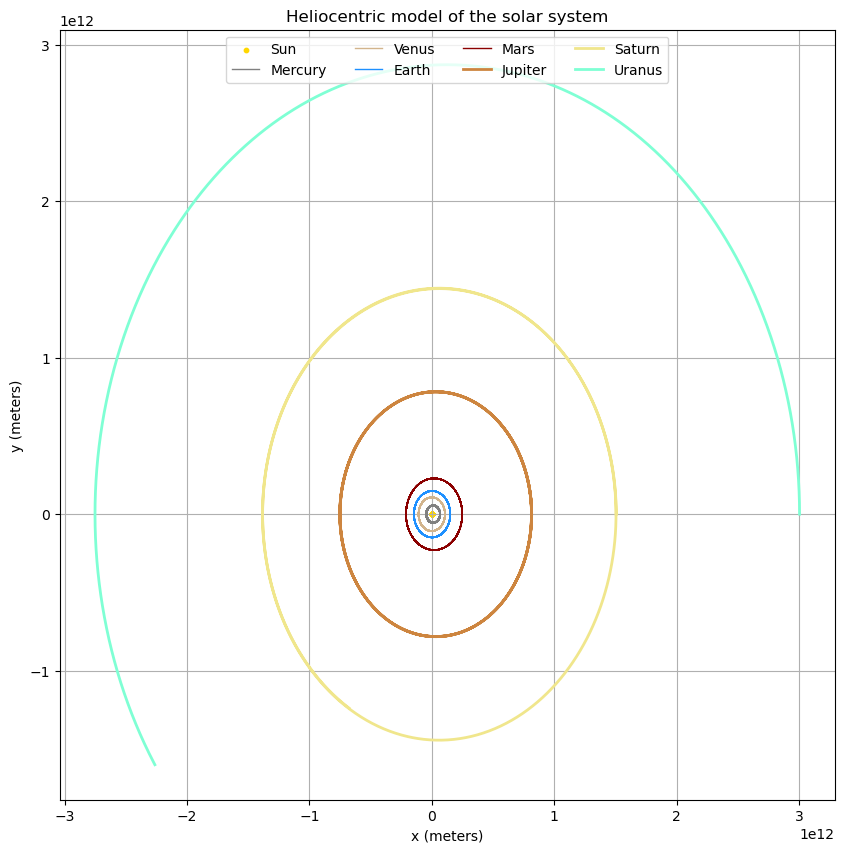

In [95]:
# Set up figure
fig, ax = plt.subplots(figsize = (10, 10));

# Plot Sun and planets
ax.scatter(df_helio['sun_x'], df_helio['sun_y'], 
           s = 10, color = 'gold', label = "Sun")
ax.plot(df_helio['mercury_x'], df_helio['mercury_y'],
           lw = 1, color = 'grey', label = "Mercury")
ax.plot(df_helio['venus_x'], df_helio['venus_y'],
           lw = 1, color = 'tan', label = "Venus")
ax.plot(df_helio['earth_x'], df_helio['earth_y'],
           lw = 1, color = 'dodgerblue', label = "Earth")
ax.plot(df_helio['mars_x'], df_helio['mars_y'],
           lw = 1, color = 'darkred', label = "Mars")
ax.plot(df_helio['jupiter_x'], df_helio['jupiter_y'],
           lw = 2, color = 'peru', label = "Jupiter")
ax.plot(df_helio['saturn_x'], df_helio['saturn_y'],
           lw = 2, color = 'khaki', label = "Saturn")
ax.plot(df_helio['uranus_x'], df_helio['uranus_y'],
           lw = 2, color = 'aquamarine', label = "Uranus")

# Label plot
ax.set_title("Heliocentric model of the solar system")
ax.set_xlabel("x (meters)")
ax.set_ylabel("y (meters)")
ax.grid()
plt.legend(loc = "upper center", ncol = 4)